# Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset and Analyze

In [2]:
# Load Dataset
df = pd.read_csv("student_data_train.csv")

# Data Preprocessing

In [3]:
# Handling missing values (if any)
print("Checking for missing values in Training Data")
print(df.isnull().sum())

Checking for missing values in Training Data
Attendance (%)                             0
Assignment Completion (%)                  0
Test Score (25%)                           0
Practical Score (25%)                      0
Exam Score (50%)                           0
Performance                                0
Age                                        0
Gender                                     0
Marital Status                             0
Children (if Married)                      0
Mother Education                           0
Father Education                           0
Guardian (Sponsor)                         0
Extracurricular Activities                 0
Online Time (Daily)                        0
Family Relationship                        0
Free Time Activities                       0
Alcoholic Consumption                      0
Religious Programs (Weekly)                0
Computer/Laptop Access (for Practicals)    0
dtype: int64


In [4]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Perform label encoding for each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features (X) and target variable (y)
X = df.drop('Performance', axis=1)
y = df['Performance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y

0       1
1       2
2       1
3       3
4       3
       ..
4995    2
4996    2
4997    2
4998    0
4999    0
Name: Performance, Length: 5000, dtype: int32

# Model Creation and Training

In [5]:
# Model Creation and Training
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale numerical features
    ('clf', DecisionTreeClassifier())  # Decision Tree classifier
])

In [6]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_

# Model Evaluation

In [7]:
# Model Evaluation
y_pred = best_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

Accuracy: 0.886
Precision: 0.8856955040918415
Recall: 0.886
F1-Score: 0.8856430204290056
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       323
           1       0.81      0.83      0.82       232
           2       0.90      0.87      0.89       217
           3       0.90      0.92      0.91       165
           4       0.78      0.72      0.75        60
           5       1.00      1.00      1.00         3

    accuracy                           0.89      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.89      0.89      0.89      1000



In [8]:
# Save the best model
joblib.dump(best_clf, 'student_performance_predictor.joblib')

['student_performance_predictor.joblib']

                                    Feature  Importance
4                          Exam Score (50%)    0.341440
2                          Test Score (25%)    0.215281
0                            Attendance (%)    0.211847
3                     Practical Score (25%)    0.175961
1                 Assignment Completion (%)    0.026281
11                       Guardian (Sponsor)    0.004792
13                      Online Time (Daily)    0.003613
9                          Mother Education    0.002864
10                         Father Education    0.002863
17              Religious Programs (Weekly)    0.002660
18  Computer/Laptop Access (for Practicals)    0.002518
14                      Family Relationship    0.002381
15                     Free Time Activities    0.001958
12               Extracurricular Activities    0.001422
7                            Marital Status    0.001282
5                                       Age    0.001048
8                     Children (if Married)    0

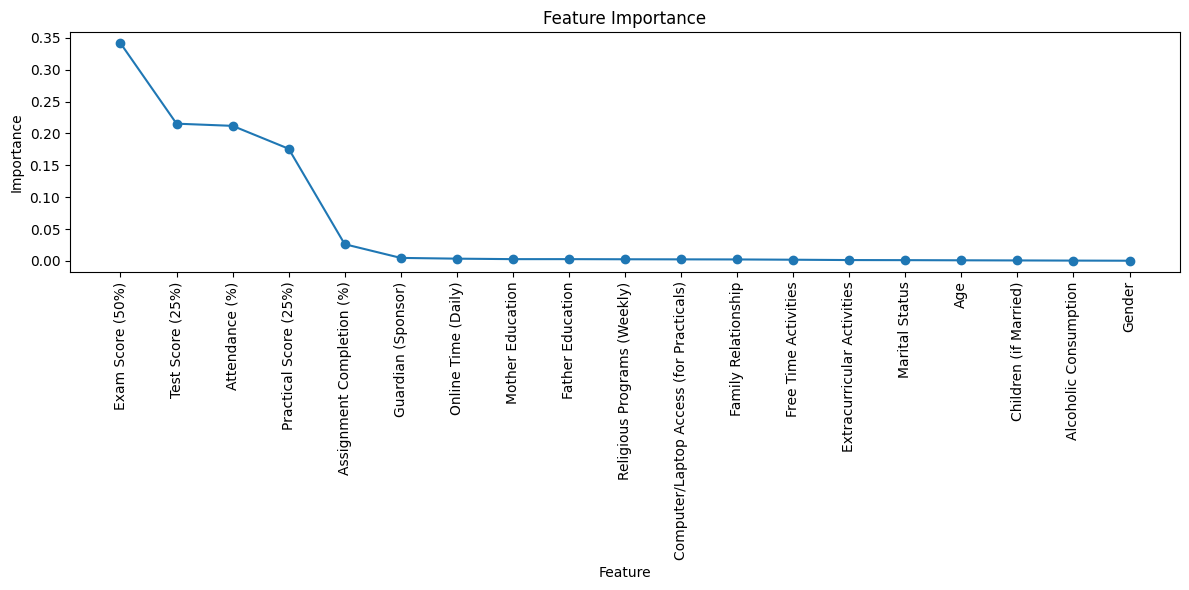

In [9]:
# Feature Importance
feature_importances = best_clf.named_steps['clf'].feature_importances_
feature_names = X_train.columns  # Assuming X_train is your training features after label encoding
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values('Importance', ascending=False)
print(feature_importance_df)


# Plot feature importances
plt.figure(figsize=(12, 6))
plt.plot(feature_importance_df['Feature'], feature_importance_df['Importance'], marker='o')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('feature_importance.jpg', dpi=600)
plt.show()

# Visualizations

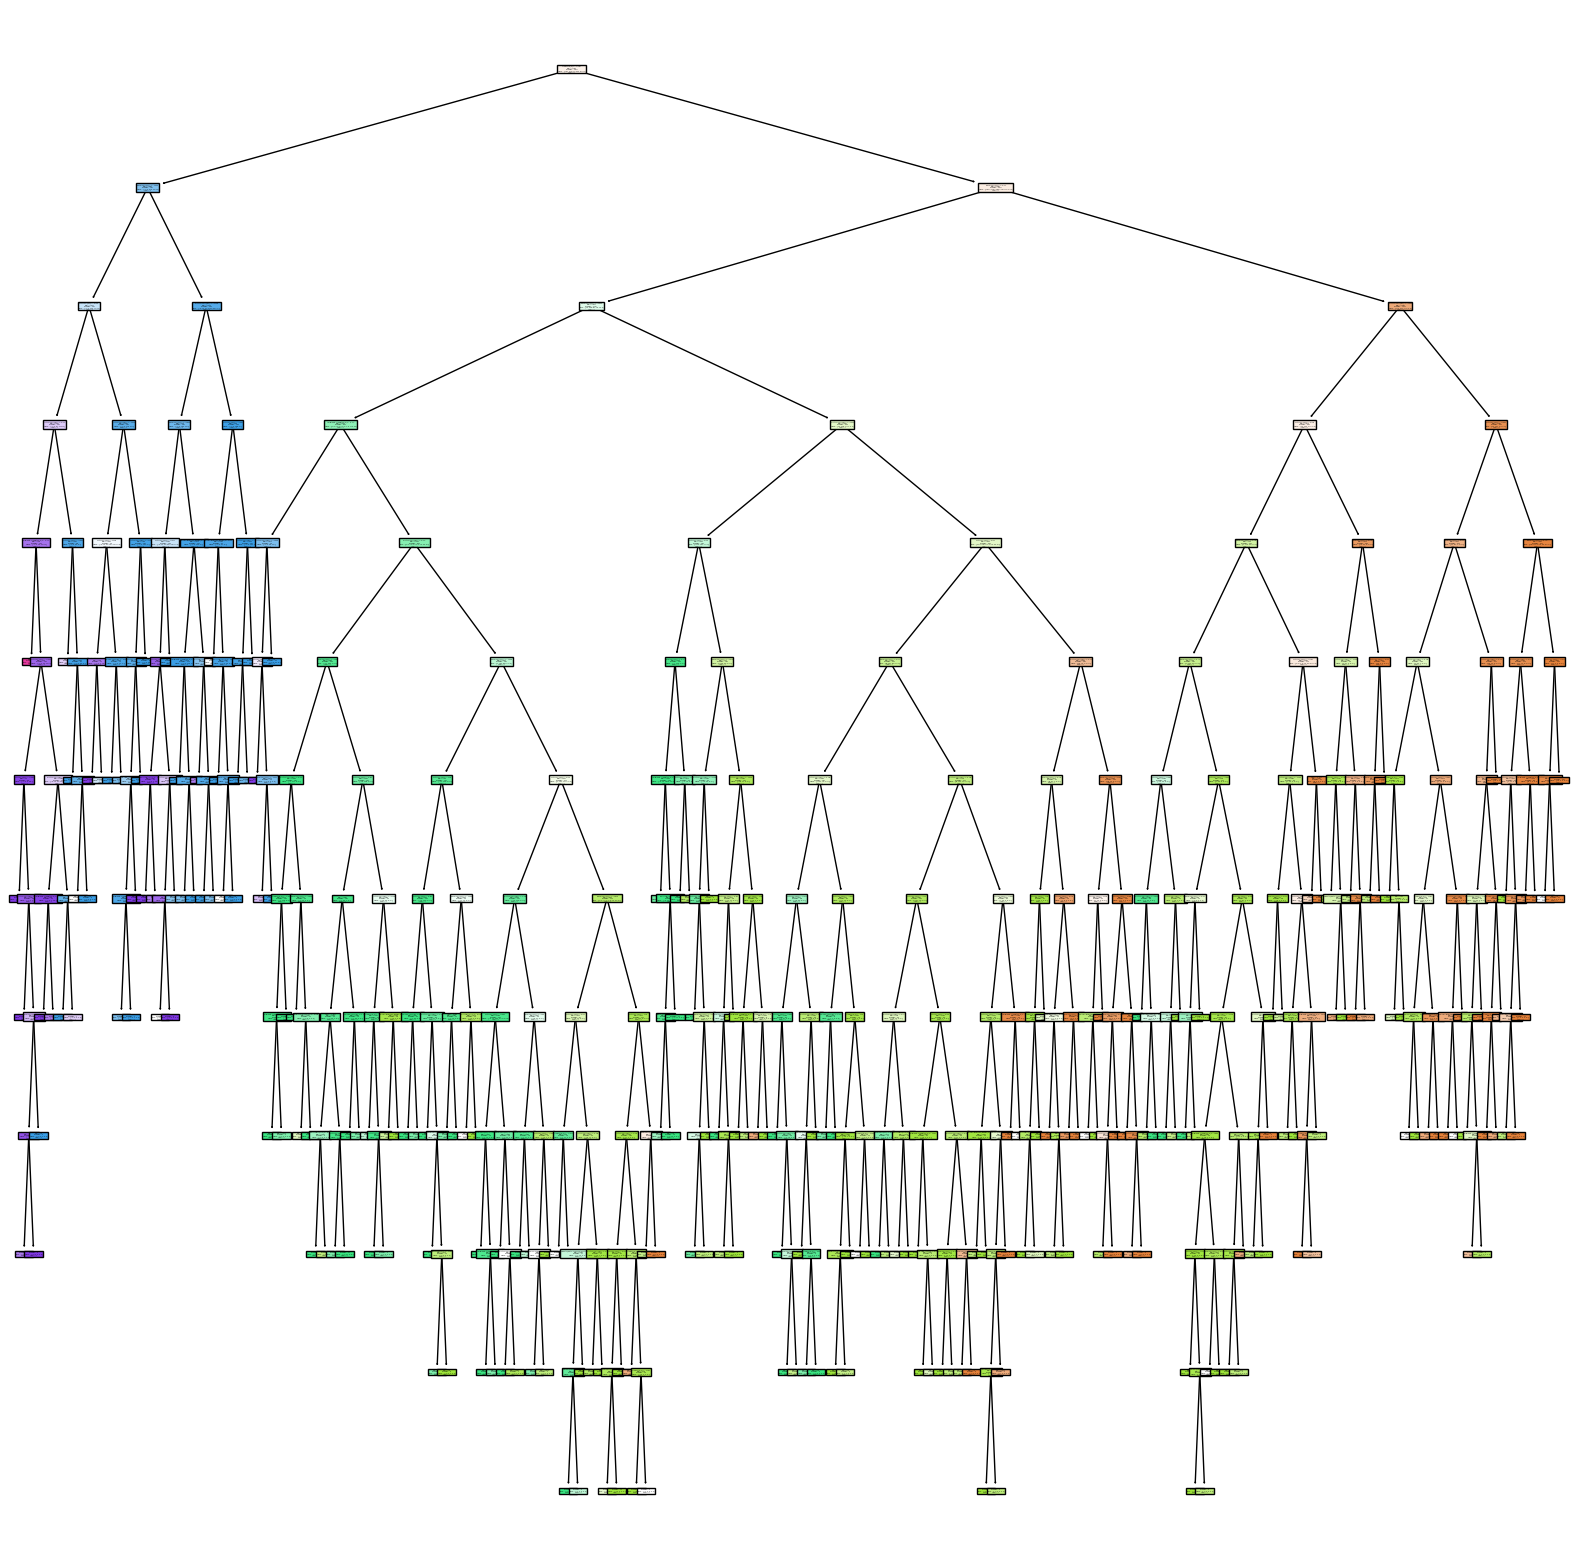

In [10]:
# Decision Tree visualization
plt.figure(figsize=(20, 20))
plot_tree(best_clf.named_steps['clf'], filled=True, feature_names=X_train.columns, class_names=list(map(str, best_clf.named_steps['clf'].classes_)))
plt.savefig('decision_tree.jpg', dpi=600)
plt.show()

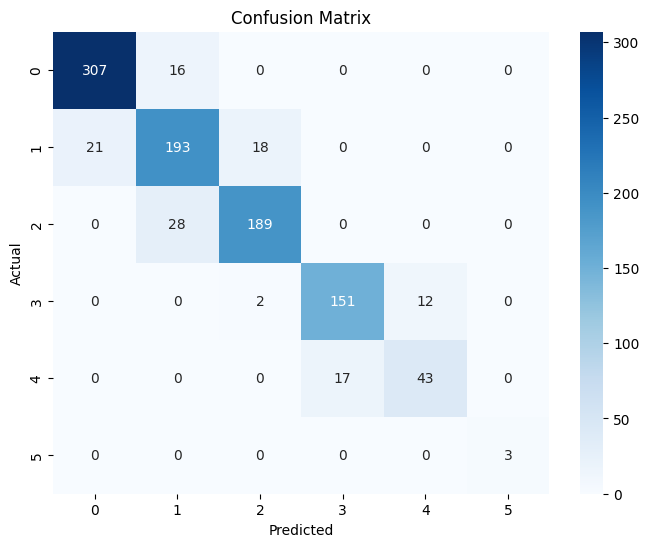

In [11]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.jpg', dpi=600)
plt.show()

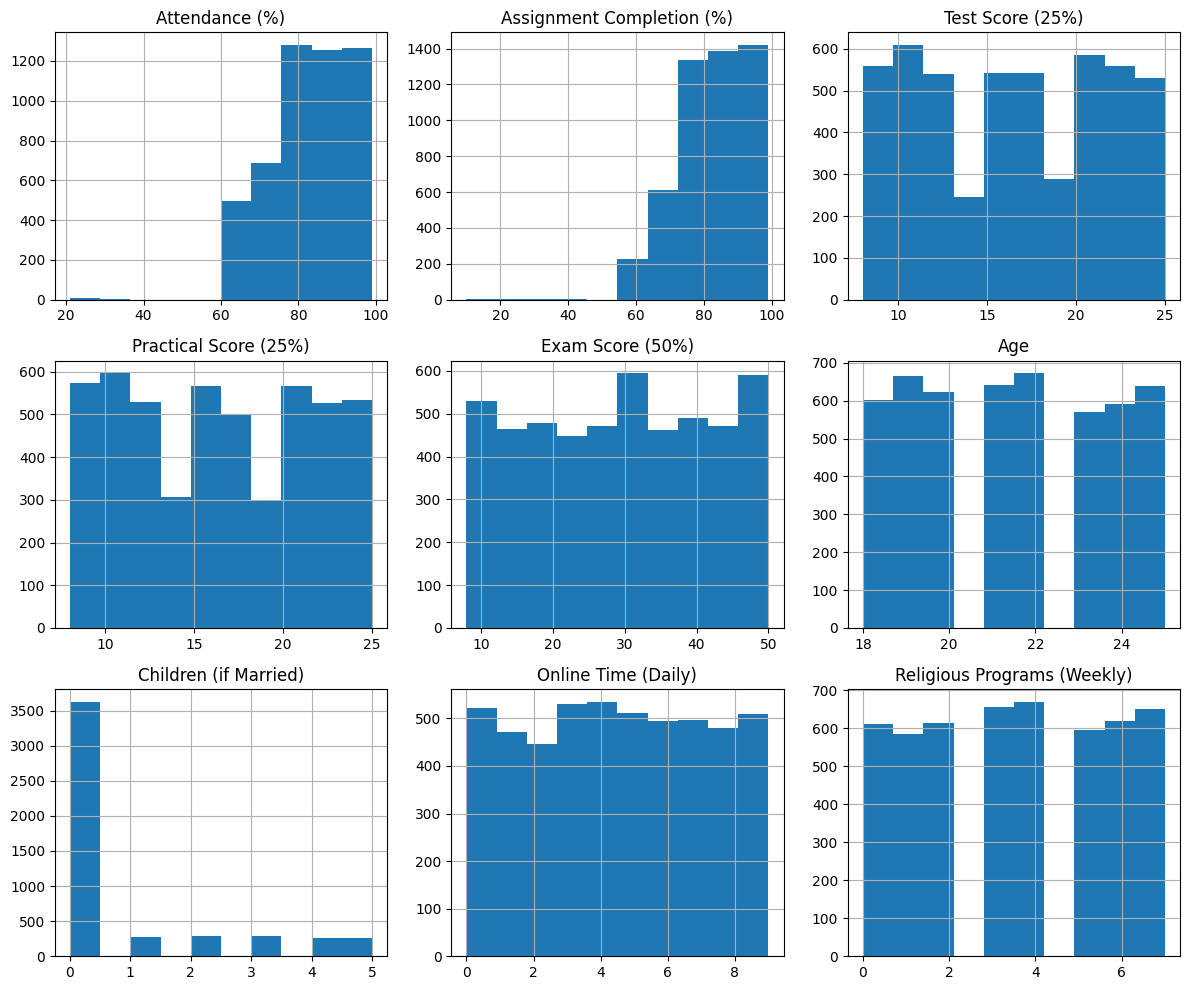

In [12]:
# Plot histograms for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])
numerical_features.hist(figsize=(12, 10))
plt.tight_layout()
plt.savefig('feature_visualizations.jpg', dpi=600)
plt.show()

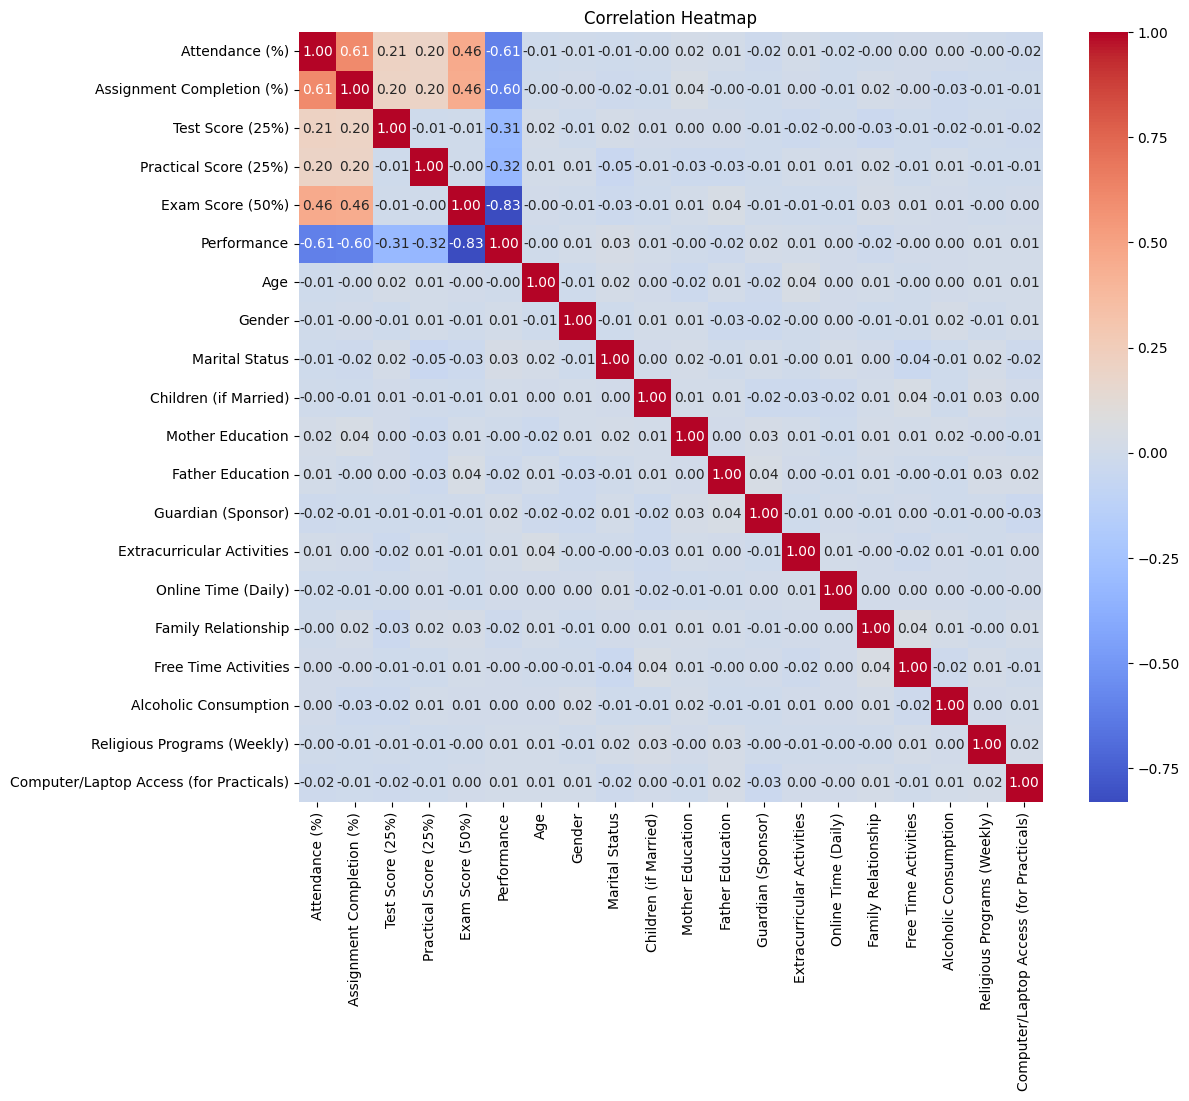

In [13]:
# Plot correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.jpg', dpi=600)
plt.show()

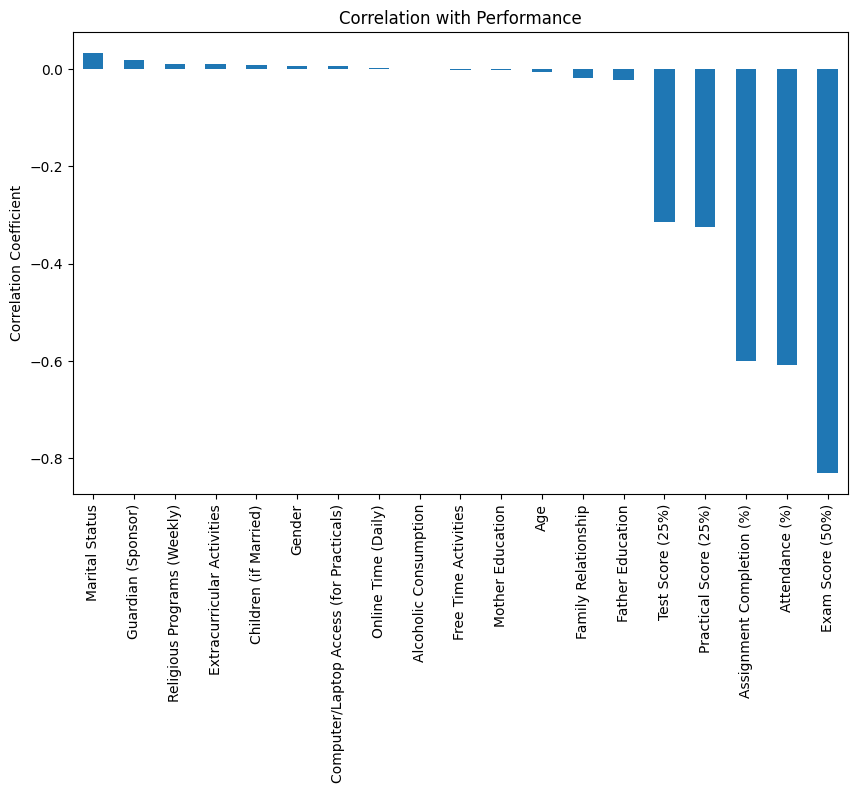

In [14]:
# Find correlations with Performance
correlations = df.corr()['Performance'].drop('Performance')
correlations = correlations.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation with Performance')
plt.ylabel('Correlation Coefficient')
plt.savefig('feature_correlation.jpg', dpi=600)
plt.show()


# Test the Model

Accuracy on Test Data: 0.886
Precision on Test Data: 0.8856955040918415
Recall on Test Data: 0.886
F1-Score on Test Data: 0.8856430204290056
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       323
           1       0.81      0.83      0.82       232
           2       0.90      0.87      0.89       217
           3       0.90      0.92      0.91       165
           4       0.78      0.72      0.75        60
           5       1.00      1.00      1.00         3

    accuracy                           0.89      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.89      0.89      0.89      1000



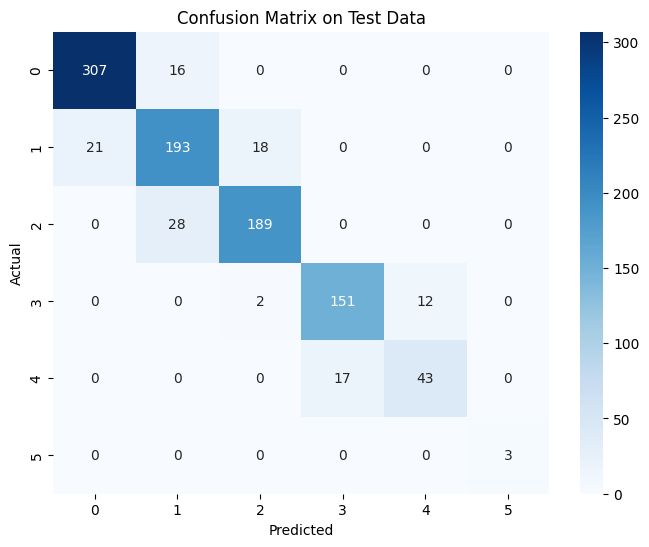

In [17]:
# Load the test dataset
df_test = X_test

# Apply label encoding to categorical variables
for column in df_test.select_dtypes(include=['object']).columns:
    df_test[column] = label_encoders[column].transform(df_test[column])


# Make predictions on the test dataset
y_pred_test = best_clf.predict(X_test)

# Evaluate the model
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred_test))
print("Precision on Test Data:", precision_score(y_test, y_pred_test, average='weighted'))
print("Recall on Test Data:", recall_score(y_test, y_pred_test, average='weighted'))
print("F1-Score on Test Data:", f1_score(y_test, y_pred_test, average='weighted'))
print(classification_report(y_test, y_pred_test))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Data')
plt.savefig('confusion_matrix_test.jpg', dpi=600)
plt.show()
